In [10]:
import pandas as pd
import json
import os
with open("/home/aamad/Desktop/phd/codice/city-pro/config/ConfigPythonAnalysis.json","r") as f:
    Dict =json.load(f)
df = pd.read_csv(os.path.join(Dict["InputBaseDir"],Dict["base_name"] + '_' + Dict["StrDates"][3] + '_' + Dict['StrDates'][3] + '_fcm_centers.csv'),delimiter = ";")

In [14]:
import pandas as pd

# Step 1: Create a sample DataFrame
data = {
    'value_to_bin': [10, 6, 1, 6, 5, 6, 7, 8, 9, 10],
    'value_to_average': [5, 3, 6, 2, 7, 4, 8, 1, 9, 2]
}
df = pd.DataFrame(data)

# Step 2: Bin the data in 'value_to_bin'
bins = [0, 3, 6, 9, 12]  # Define bin edges
labels = ['Bin1', 'Bin2', 'Bin3', 'Bin4']  # Define bin labels

df['bins'] = pd.cut(df['value_to_bin'], bins=bins, labels=labels, right=False)
print(df)
# Step 3: Group by the bins and compute the average of 'value_to_average'
result = df.groupby('bins')['value_to_average'].mean().reset_index()

print(result)

   value_to_bin  value_to_average  bins
0            10                 5  Bin4
1             6                 3  Bin3
2             1                 6  Bin1
3             6                 2  Bin3
4             5                 7  Bin2
5             6                 4  Bin3
6             7                 8  Bin3
7             8                 1  Bin3
8             9                 9  Bin4
9            10                 2  Bin4
   bins  value_to_average
0  Bin1          6.000000
1  Bin2          7.000000
2  Bin3          3.600000
3  Bin4          5.333333


/tmp/ipykernel_37565/3532013409.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby('bins')['value_to_average'].mean().reset_index()


{1: {'holiday': 'red', 'not_holiday': 'blue'}, 2: {'holiday': 'green', 'not_holiday': 'orange'}, 3: {'holiday': 'purple', 'not_holiday': 'brown'}, 4: {'holiday': 'pink', 'not_holiday': 'gray'}}
Point:  0.8  StdDev:  0.0  Class: 4  type:  holiday  Color:  pink  Shape:  >  Identifier:  (4, 'holiday')
Point:  0.47  StdDev:  0.01  Class: 1  type:  holiday  Color:  red  Shape:  o  Identifier:  (1, 'holiday')
Point:  0.42  StdDev:  0.0  Class: 4  type:  holiday  Color:  pink  Shape:  >  Identifier:  (4, 'holiday')
Point:  0.81  StdDev:  0.01  Class: 1  type:  not_holiday  Color:  blue  Shape:  s  Identifier:  (1, 'not_holiday')
Point:  0.9  StdDev:  0.0  Class: 4  type:  not_holiday  Color:  gray  Shape:  p  Identifier:  (4, 'not_holiday')
Point:  0.94  StdDev:  0.0  Class: 4  type:  not_holiday  Color:  gray  Shape:  p  Identifier:  (4, 'not_holiday')
Point:  0.88  StdDev:  0.0  Class: 3  type:  not_holiday  Color:  brown  Shape:  <  Identifier:  (3, 'not_holiday')
Point:  0.83  StdDev:  0.

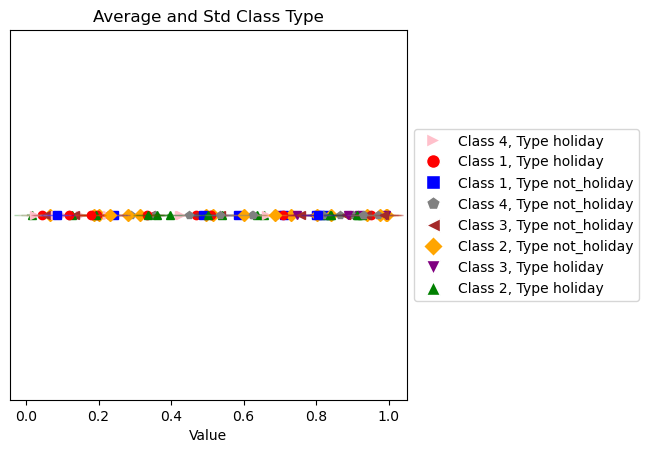

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Example data
N = 100  # Number of points
Avareges = np.random.rand(N)  # Random average values
std_devs = np.random.rand(N) * 0.01  # Random standard deviations
classes = np.random.randint(1, 5, size=N)  # Random classes between 1 and 4
Types = ["holiday","not_holiday"]
types = np.random.choice(Types, N)
PossibleShapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', 'P', '*', 'X']
PossibleColors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'black']
Classes = [1, 2, 3, 4]
Class2Type2Colors = {Class: {Type:"" for Type in Types} for Class in Classes}
Class2Type2Shapes = {Class: {Type:"" for Type in Types} for Class in Classes}
count = 0
for cl in range(len(Classes)):
    Class = Classes[cl]
    for t in range(len(Types)):
        Type = Types[t]
        Class2Type2Shapes[Class][Type] = PossibleShapes[count]
        Class2Type2Colors[Class][Type] = PossibleColors[count]
        count += 1
print(Class2Type2Colors)
# Define colors for each class

# Plotting
def PlotIntervals(Avareges, std_devs, classes, types,Class2Type2Colors,Class2Type2Shapes,Title):
    """
        Input:
            Averages: List of average values
            std_devs: List of standard deviations
            classes: List of classes
            NOTE: They could be 3 different columns of a dataframe (they must hold the same length)
    
    """
    assert len(Avareges) == len(std_devs) == len(classes), 'The input lists must have the same length'
    legend = []
    legend_entries = set()
    fig, ax = plt.subplots()
    for point, std_dev, cls,type in zip(Avareges, std_devs, classes,types):
        color = Class2Type2Colors[cls][str(type)]
        shape = Class2Type2Shapes[cls][str(type)]
        # Plot point
        ax.plot(point, 0, shape, color=color)
        class_type_identifier = (cls, str(type))
        print("Point: ",round(point,2)," StdDev: ",round(std_dev,2)," Class:",cls," type: ",type," Color: ",color," Shape: ",shape," Identifier: ",class_type_identifier)
        if class_type_identifier not in legend_entries:
            legend.append(Line2D([0], [0], marker=shape, color='w', markerfacecolor=color, markersize=10, label=f"Class {cls}, Type {type}"))
            legend_entries.add(class_type_identifier)
            TemporaryAddLegend = True

        # Plot interval
        ax.plot([point - std_dev, point + std_dev], [0, 0], color=color, marker='_', markersize=20, alpha = 0.3)
    # Customize the plot
    ax.set_yticks([])  # Hide y-axis
    ax.set_xlabel('Value')
#    legend_ = plt.legend(legend)
#    frame = legend_.get_frame()
#    frame.set_facecolor('white')    
    plt.title(Title)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])  # Resize plot to make space for the legend
    print(legend)
    ax.legend(handles = legend,loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
    
    # Show plot
    plt.show()

PlotIntervals(Avareges, std_devs, classes, types,Class2Type2Colors,Class2Type2Shapes,"Average and Std Class Type")

Point:  0.8  StdDev:  0.0  Class: 4  type:  holiday  Color:  pink  Shape:  >  Identifier:  (4, 'holiday')
Point:  0.47  StdDev:  0.01  Class: 1  type:  holiday  Color:  red  Shape:  o  Identifier:  (1, 'holiday')
Point:  0.42  StdDev:  0.0  Class: 4  type:  holiday  Color:  pink  Shape:  >  Identifier:  (4, 'holiday')
Point:  0.81  StdDev:  0.01  Class: 1  type:  not_holiday  Color:  blue  Shape:  s  Identifier:  (1, 'not_holiday')
Point:  0.9  StdDev:  0.0  Class: 4  type:  not_holiday  Color:  gray  Shape:  p  Identifier:  (4, 'not_holiday')
Point:  0.94  StdDev:  0.0  Class: 4  type:  not_holiday  Color:  gray  Shape:  p  Identifier:  (4, 'not_holiday')
Point:  0.88  StdDev:  0.0  Class: 3  type:  not_holiday  Color:  brown  Shape:  <  Identifier:  (3, 'not_holiday')
Point:  0.83  StdDev:  0.0  Class: 1  type:  not_holiday  Color:  blue  Shape:  s  Identifier:  (1, 'not_holiday')
Point:  0.94  StdDev:  0.01  Class: 2  type:  not_holiday  Color:  orange  Shape:  D  Identifier:  (2, '

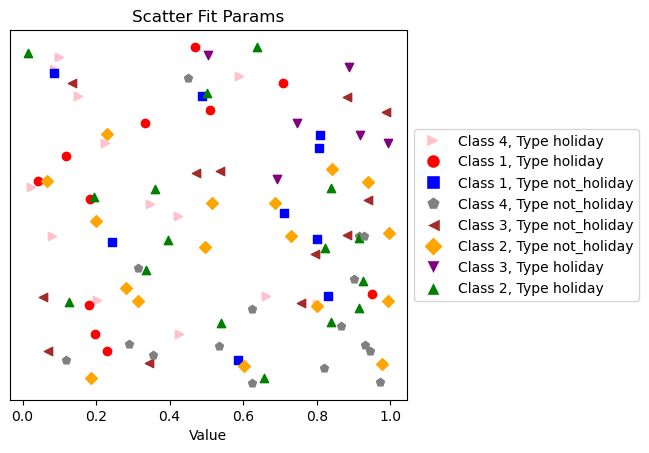

In [53]:
def ScatterFitParams(A, b, classes, types,Class2Type2Colors,Class2Type2Shapes,Title,Xlabel,Ylabel):
    assert len(A) == len(b) == len(classes), 'The input lists must have the same length'
    legend = []
    legend_entries = set()
    fig, ax = plt.subplots()
    for point, std_dev, cls,type in zip(A, b, classes,types):
        color = Class2Type2Colors[cls][str(type)]
        shape = Class2Type2Shapes[cls][str(type)]
        # Plot point
        class_type_identifier = (cls, str(type))
        print("Point: ",round(point,2)," StdDev: ",round(std_dev,2)," Class:",cls," type: ",type," Color: ",color," Shape: ",shape," Identifier: ",class_type_identifier)
        ax.scatter(point, std_dev, marker=shape, color=color)
        if class_type_identifier not in legend_entries:
            legend.append(Line2D([0], [0], marker=shape, color='w', markerfacecolor=color, markersize=10, label=f"Class {cls}, Type {type}"))
            legend_entries.add(class_type_identifier)
            TemporaryAddLegend = True
    # Customize the plot
    ax.set_yticks([])  # Hide y-axis
    ax.set_xlabel(Xlabel)
    ax.set_ylabel(Ylabel)
#    legend_ = plt.legend(legend)
#    frame = legend_.get_frame()
#    frame.set_facecolor('white')    
    plt.title(Title)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])  # Resize plot to make space for the legend
    print(legend)
    ax.legend(handles = legend,loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
    
    # Show plot
    plt.show()

ScatterFitParams(Avareges, std_devs, classes, types,Class2Type2Colors,Class2Type2Shapes,"Scatter Fit Params")

In [3]:
import polars as pl
from FittingProcedures import *
import matplotlib.pyplot as plt

Fcm = pl.read_csv("/home/aamad/codice/city-pro/output/bologna_mdt_center/bologna_mdt_2022-07-01_2022-07-01_fcm.csv")
Feature = "time_hours"
columns_expo_fit = ["Day","Class","error","<x>","beta","A","R2","n_people"]
columns_pl_fit = ["Day","Class","error","<x>","alpha","A","R2","n_people"]
columns_gaussian_fit = ["Day","Class","error","mu","sigma","A","n_people"]
columns_maxwellian_fit = ["Day","Class","error","mu","sigma","A","n_people"]
# 
columns_data_and_fit = ["Day","Class","x","y","y_fit"]
StrDate = "2022-07-01"
Fcm = Fcm.with_columns((pl.col("time")/3600).alias("time_hours"))
FcmNormalUsers = Fcm.filter(Fcm["time_hours"] < 2.5)
dict_parameters_expo_fit_new = {key:[] for key in columns_expo_fit}
dict_expo_data_and_fit_new = {key:[] for key in columns_data_and_fit} 
dict_parameters_pl_fit_new = {key:[] for key in columns_pl_fit}
dict_pl_data_and_fit_new = {key:[] for key in columns_data_and_fit}
N_people_class = len(FcmNormalUsers)
dict_parameters_expo_fit_new,dict_parameters_pl_fit_new,dict_expo_data_and_fit_new,dict_pl_data_and_fit_new = comparison_pl_exp_single_class(FcmNormalUsers[Feature].to_list(),   
                                                                                                                            Feature,
                                                                                                                            dict_parameters_expo_fit_new,
                                                                                                                            dict_parameters_pl_fit_new,
                                                                                                                            dict_expo_data_and_fit_new,
                                                                                                                            dict_pl_data_and_fit_new,
                                                                                                                            StrDate,
                                                                                                                            10,
                                                                                                                            N_people_class)


PyMC3 not installed


(array([3700,   39,   20,    1,    5,    0,    1,    1,    0,    1]),
 array([3.33333333e-03, 1.12600000e+00, 2.24866667e+00, 3.37133333e+00,
        4.49400000e+00, 5.61666667e+00, 6.73933333e+00, 7.86200000e+00,
        8.98466667e+00, 1.01073333e+01, 1.12300000e+01]))

In [ ]:
import polars as pl
from FittingProcedures import *
import matplotlib.pyplot as plt

def compare_exponential_power_law_from_xy(bins,n):
    """
        @params bins: np.array 1D
        @params n: np.array 1D
        @describe: Compare the exponential and power law fits for the distribution of the features
        @
    """
    if len(bins) == len(n) + 1:
        bins_compute = bins[1:]
        # Avoid 0s
        bins_plot = bins[:-1]
    else:
        bins_compute = bins
        bins_plot = bins
        pass
    # Compute Fit Parameters
    logn = np.log(n)
    logbins = np.log(bins_compute)
    fit_exp = np.polyfit(bins_plot,logn,1)
    fit_pl = np.polyfit(logbins,logn,1)
    # Compute Fitted Curve
    A_exp = np.exp(fit_exp[1])
    A_pl = np.exp(fit_pl[1])
    beta_exp = fit_exp[0]
    alpha_pl = fit_pl[0] 
    exp_ = A_exp*np.exp(bins_plot*beta_exp)
    pl_ = A_pl*bins_plot**alpha_pl
    # Compute Chi^2
    error_pl = np.sqrt(np.mean((n[1:] - pl_[1:])**2))
    error_exp = np.sqrt(np.mean((n[1:] - exp_[1:])**2))
    # Compute R^2
    n_mean = np.nanmean(n)
    S_tot = np.sum((n - n_mean)**2)
    R2_pl = 1 - error_pl/S_tot
    R2_exp = 1 - error_exp/S_tot

    return A_exp,beta_exp,exp_,error_exp,R2_exp,A_pl,alpha_pl,pl_,error_pl,R2_pl,bins_plot
ks = np.linspace(0.1,100,100)
fig,ax = plt.subplots(1,1,figsize = (10,10))
errors_pl = []
errors_exp = []
count = 0
for k in ks:
    x = np.linspace(0.1,10,100)
    noise = k*np.random.normal(0,0.1,100)
    y = 32*x**(-2) + noise
    x = x[y > 0]
    y = y[y > 0]
    A_exp,beta_exp,exp_,error_exp,R2_exp,A_pl,alpha_pl,pl_,error_pl,R2_pl,bins_plot = compare_exponential_power_law_from_xy(x,y)
#    print("A_exp: ",A_exp,"\nbeta_exp: ",beta_exp,"\nerror_exp: ",error_exp,"\nR2_exp: ",R2_exp)
#    print("A_pl: ",A_pl,"\nalpha_pl: ",alpha_pl,"\nerror_pl: ",error_pl,"\nR2_pl: ",R2_pl)
    if count == 0:
        ax.scatter(bins_plot,y)
    ax.plot(bins_plot,exp_,label = "exp")
    ax.plot(bins_plot,pl_,label = "pl")
    errors_pl.append(error_pl)
    errors_exp.append(error_exp)
    count += 1
ax.set_yscale("log")
plt.show()
fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.plot(ks,errors_pl,label = "pl")
ax.plot(ks,errors_exp,label = "exp")

plt.show()

In [22]:
import polars as pl
from FittingProcedures import *
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter1d
import os

def _iteratively_diminish_bins_until_no_0_from_end(_v_data,_y,_x,_bins):
    """
        NOTE: This function must be used to avoid 0s in the bins when we want to 
        have this distribution to be fitted with powerlaw or exponential.
        Indeed, it happens, that these cases are not well defined when we have 0s in the bins or values.
        Indeed, the fit is done usually with linear functions with logarithm in the y-axis and x-axis.
    """
    is_diminished = False
    while 0 in _y:
        _bins -= 1
        _y,_x = np.histogram(_v_data,bins=_bins)
        is_diminished = True
    if is_diminished:
        return _y,_x[1:]
    else:
        return _y,_x

def enrich_vector_to_length(vector, target_length):
    """
        @params vector: np.array: vector to be enriched.
        @params target_length: int: target length of the vector.
        @return vector: np.array: enriched vector.
        Transform the vector in a vector of length target_length.
        It adds iteratviely poits that are in the middle of the vector
    """
    while len(vector) < target_length:
        new_vector = []
        for i in range(len(vector) - 1):
            new_vector.append(vector[i])
            new_vector.append((vector[i] + vector[i + 1]) / 2)
        new_vector.append(vector[-1])
        vector = new_vector[:target_length]
    return vector
def PlotInsetXmeans(class_2_means,day_2_class_2_mean,StrDates,Feature,ax_inset):
    """

    """
    # number classes
    Classes = list(class_2_means.keys())
    average_mean_over_day = np.zeros(len(Classes))
    for StrDate in StrDates:
        daily_means = np.zeros(len(Classes))
        for class_idx in Classes:
            x_means_day = day_2_class_2_mean[StrDate][class_idx]
            daily_means[class_idx] += x_means_day
            average_mean_over_day[class_idx] += x_means_day
        ax_inset.scatter(Classes,daily_means,s = 25)
        ax_inset.set_xticks(Classes)
        if Feature == "time_hours":
            ax_inset.set_xlabel("class",fontsize = 12)
            ax_inset.set_ylabel(r"$\langle t \rangle$ (h)",fontsize = 12)        
        else:
            ax_inset.set_xlabel("class",fontsize = 12)
            ax_inset.set_ylabel(r"$\langle l \rangle$ (km)",fontsize = 12)
    average_mean_over_day = average_mean_over_day/len(StrDates)
    fit = np.polyfit(Classes,average_mean_over_day,1)
    a = fit[0]
    b = fit[1]
    ax_inset.scatter(Classes,average_mean_over_day,s = 25)
    ax_inset.plot(Classes,a*np.array(Classes) + b)
    return ax_inset



def from_data_2_distributions(FcmNormalUsersClass,Feature,bin_size_time_hours,bin_size_length_km,range_time_hours = (0.1,2),range_length_km = (0.1,10),enriched_vector_length = 50):
    """
        @description:
            Computes the distribution of the feature for the class and the fit.
            - the bins are computed in the range of the feature
    """
    if Feature == "time_hours":
        bin_range = range_time_hours
        bin_range[1] = bin_range[1]
        bins = int((bin_range[1] - bin_range[0])/bin_size_time_hours)
        print("bin_size: ",bin_size_time_hours)
    elif Feature == "lenght_km":
        bin_range = range_length_km
        bin_range[1] = bin_range[1]
        bins = int((bin_range[1] - bin_range[0])/bin_size_length_km)
        print("bin_size: ",bin_size_length_km)
    print("number bins: ",bins)
    print("bin_range: ",bin_range)
    n,x = np.histogram(FcmNormalUsersClass,bins = bins,range = bin_range)
    x = x[1:]
    n,x = _iteratively_diminish_bins_until_no_0_from_end(FcmNormalUsersClass,n,x,len(x))
    A_exp,beta_exp,exp_,error_exp,R2_exp,A_pl,alpha_pl,pl_,error_pl,R2_pl,bins_plot = compare_exponential_power_law_from_xy(x,n)
#    x = np.array(enrich_vector_to_length(x, enriched_vector_length))
    x_mean = np.nanmean(FcmNormalUsersClass)
#    if Feature == "time_hours":
#        n = np.array(gaussian_filter1d(enrich_vector_to_length(n, enriched_vector_length), 3))
#    else:
#        n = np.array(gaussian_filter1d(enrich_vector_to_length(n, enriched_vector_length), 3))            
    exp_ = A_exp*np.exp(beta_exp*x)
    pl_ = A_pl*x**alpha_pl
    assert len(x) == len(n) == len(exp_) == len(pl_), f"The vectors must have the same length: x {len(x)}, n {len(n)}, exp_ {len(exp_)}, pl_ {len(pl_)}"
    if error_exp < error_pl:
        return x,n,x_mean,A_exp,beta_exp,exp_,True 
    else:
        return x,n,x_mean,A_pl,alpha_pl,pl_,False
    


# Plot Comparison of Exponential and Power Law Fits
def Plot_time_length_distributions_conditioned_classes(Features,
                                   Classes,
                                   StrDates,
                                   fcm_dir,
                                   filter_space,
                                   filter_time,
                                   labels,
                                    bin_size_time_hours,
                                    bin_size_length_km,
                                   range_time_hours = (0.1,2),
                                   range_length_km = (0.1,10),
                                   enriched_vector_length = 50
                                   ):
    # Conditioned on Class
    feature_2_day_2_class_2_x = {Feature:{day:{class_:[] for class_ in Classes} for day in StrDates} for Feature in Features}
    feature_2_day_2_class_2_y = {Feature:{day:{class_:[] for class_ in Classes} for day in StrDates} for Feature in Features}
    feature_2_day_2_class_2_y_fit = {Feature:{day:{class_:[] for class_ in Classes} for day in StrDates} for Feature in Features}
    feature_2_day_2_class_2_mean = {Feature:{day:{class_:0 for class_ in Classes} for day in StrDates} for Feature in Features}
    print("number classes: ",len(Classes)," number days: ",len(StrDates)," number features: ",len(Features))
    for Feature in Features:
        print("Feature: ",Feature)
        fit_info = {"class":[],"day":[],"alpha":[],"beta":[],"fit_name":[],"<x>":[]}
        # Hetorogeneity
        dict_Lkclass = {"class":[],"day":[],"Lk":[]}

        # Integrated over Days
        for StrDate in StrDates:
            print("StrDate: ",StrDate)
            # Read Fcm
            Fcm = pl.read_csv(os.path.join(fcm_dir,f"bologna_mdt_{StrDate}_{StrDate}_fcm.csv"))
            FcmNormalUsers = Fcm.filter(filter_space,
                                        filter_time)
            x_means_day = np.zeros(len(Classes))
            fig,ax = plt.subplots(1,1,figsize = (10,10))
            
            # Divide by class
            for class_idx in Classes:
                print("Class: ",class_idx)
                FcmNormalUsersClass = FcmNormalUsers.filter(pl.col("class") == class_idx)[Feature].to_list()
                # Compute fit 
                x,n,x_mean,A_fit,b_fit,y_fit,is_exp = from_data_2_distributions(FcmNormalUsersClass,
                                                                                Feature,
                                                                                bin_size_time_hours,
                                                                                bin_size_length_km,
                                                                                range_time_hours,
                                                                                range_length_km,
                                                                                enriched_vector_length)

                fit_info["class"].append(class_idx)
                fit_info["day"].append(StrDate)
                if is_exp:
                    fit_info["alpha"].append(None)
                    fit_info["beta"].append(b_fit)
                    # dfLk
                    dict_Lkclass["class"].append(class_idx+1)
                    dict_Lkclass["day"].append(StrDate)
                    dict_Lkclass["Lk"].append(x_mean)
                else:
                    fit_info["alpha"].append(b_fit)
                    fit_info["beta"].append(None)
                fit_info["fit_name"].append("exp" if is_exp else "pl")
                fit_info["<x>"].append(x_mean)

                x_mean = np.sum(FcmNormalUsersClass)/len(FcmNormalUsersClass)
                print("size x: ",len(x)," size n: ",len(n)," size y_fit: ",len(y_fit), "<x>: ",x_mean)
                # append
                feature_2_day_2_class_2_y[Feature][StrDate][class_idx] = n
                feature_2_day_2_class_2_x[Feature][StrDate][class_idx] = x
                feature_2_day_2_class_2_mean[Feature][StrDate][class_idx] = x_mean
                feature_2_day_2_class_2_y_fit[Feature][StrDate][class_idx] = y_fit
                x_means_day[class_idx] = x_mean
                # Plot
                if class_idx != 3:
                    ax.scatter(x,n,label = labels[class_idx])
                    ax.plot(x,y_fit,label = "")
                ax.set_yscale("log")
                if Feature == "time_hours":
                    ax.set_xlabel(r"$t (h)$",fontsize = 25)
                    ax.set_ylabel(r"$P(t (h))$",fontsize = 25)
                else:
                    ax.set_xlabel(r"$l (km)$",fontsize = 25)
                    ax.set_ylabel(r"$P(l (km))$",fontsize = 25)
            ax.legend()
            from mpl_toolkits.axes_grid1.inset_locator import inset_axes
            ax_inset = inset_axes(ax, width="20%", height="20%", loc="lower left")
            ax_inset.scatter(Classes,x_means_day,s = 25)
            ax_inset.set_xticks(Classes)
            if Feature == "time_hours":
                ax_inset.set_xlabel("class",fontsize = 12)
                ax_inset.set_ylabel(r"$\langle t \rangle$ (h)",fontsize = 12)        
            else:
                ax_inset.set_xlabel("class",fontsize = 12)
                ax_inset.set_ylabel(r"$\langle l \rangle$ (km)",fontsize = 12)
            plt.savefig(os.path.join(fcm_dir,"plots",f"{Feature}_distribution_by_classes_{StrDate}.png"))
            plt.show()
        # Compute Fit Lk,k^[alpha]
        pl.DataFrame(fit_info).write_csv(os.path.join(fcm_dir,"plots",f"fit_info_final_version_{Feature}.csv"))
        dict_info_fit_lk = {"day":[],"alpha":[],"Lmax":[]}
        df_Lkclass = pl.DataFrame(dict_Lkclass)
        for StrDate in StrDates:
            df_Lkclassday = df_Lkclass.filter(pl.col("day") == StrDate)
            if len(Classes) == len(df_Lkclassday):
                fit = np.polyfit(np.log(np.array(df_Lkclassday["class"])),np.log(np.array(df_Lkclassday["Lk"])),1)
                alpha = fit[0]
                Lmax = np.exp(fit[1])
                dict_info_fit_lk["day"].append(StrDate)
                dict_info_fit_lk["alpha"].append(alpha)
                dict_info_fit_lk["Lmax"].append(Lmax)
                if len(Classes) == len(df_Lkclassday):
                    df_Lkclassday.write_csv(os.path.join(fcm_dir,"plots",f"dict_Lkclass_{Feature}_{StrDate}.csv"))
#                fig,ax = plt.subplots(1,1,figsize = (10,10))
#                ax.scatter(df_Lkclassday["class"],df_Lkclassday["Lk"])
#                ax.plot(df_Lkclassday["class"],np.array(df_Lkclassday["class"])**alpha/Lmax)
#                ax.set_xlabel("class")
#                ax.set_ylabel("Lk")
#                ax.set_title(Feature +" " + StrDate)
#                plt.show()
        df_info_fit_lk = pl.DataFrame(dict_info_fit_lk)
        df_info_fit_lk.write_csv(os.path.join(fcm_dir,"plots",f"dict_info_fit_lk_{Feature}.csv"))
        # Compute Heterogeneous
        for StrDate in StrDates:
            # vector 
            df_Lkclassday = df_Lkclass.filter(pl.col("day") == StrDate)
            if len(Classes) == len(df_Lkclassday):
                Lk = np.array(df_Lkclassday["Lk"])
                # class
                df_info_fit_lk_day = df_info_fit_lk.filter(pl.col("day") == StrDate)
                alpha = np.array(df_info_fit_lk_day["alpha"])[0]
                Lmax = np.array(df_info_fit_lk_day["Lmax"])[0]
                Fcm = pl.read_csv(os.path.join(fcm_dir,f"bologna_mdt_{StrDate}_{StrDate}_fcm.csv"))
                # Not conditioned distribution 
                FcmNormalUsers = Fcm.filter(filter_space,
                                            filter_time)
                x,n,x_mean,A_fit,b_fit,y_fit,is_exp = from_data_2_distributions(FcmNormalUsers,
                                                                                Feature,
                                                                                bin_size_time_hours,
                                                                                bin_size_length_km,
                                                                                range_time_hours,
                                                                                range_length_km,
                                                                                enriched_vector_length)

                n = np.array(gaussian_filter1d(enrich_vector_to_length(n, enriched_vector_length), 3))
                # Final object heterogeneity
                n_aggregated = np.zeros(enriched_vector_length)
                for class_idx in Classes:
                    # heterogeneity weight
                    k = class_idx + 1
                    Lk_k = Lk[class_idx]
                    Lk_k_alpha_over_Lmax = k**alpha/Lmax
                    # Fit again
                    FcmNormalUsersClass = FcmNormalUsers.filter(pl.col("class") == class_idx)[Feature].to_list()
                    # Compute fit 
                    x,n_class,x_mean,A_fit,b_fit,y_fit,is_exp = from_data_2_distributions(FcmNormalUsersClass,
                                                                                    Feature,
                                                                                    bin_size_time_hours,
                                                                                    bin_size_length_km,
                                                                                    range_time_hours,
                                                                                    range_length_km,
                                                                                    enriched_vector_length)


                    # hetoregeneity
                    n_class = gaussian_filter1d(enrich_vector_to_length(np.array(n_class),enriched_vector_length),3)
                    n_aggregated += Lk_k_alpha_over_Lmax*n_class 

                x = np.array(enrich_vector_to_length(x, enriched_vector_length))
                n_aggregated = np.array(gaussian_filter1d(enrich_vector_to_length(n_aggregated, enriched_vector_length), 3))/len(Classes)
                n_aggregated/=np.sum(n_aggregated)
                n/=np.sum(n)
                fig,ax = plt.subplots(1,1,figsize = (10,10))
                ax.scatter(x,n,label = StrDate)
                ax.plot(x,n_aggregated,label="",linestyle = "--")
                ax.set_yscale("log")
                if Feature == "time_hours":
                    ax.set_xlabel(r"$t (h)$",fontsize = 25)
                    ax.set_ylabel(r"$P(t (h))$",fontsize = 25)
                else:
                    ax.set_xlabel(r"$l (km)$",fontsize = 25)
                    ax.set_ylabel(r"$P(l (km))$",fontsize = 25)
        plt.savefig(os.path.join(fcm_dir,"plots",f"{Feature}_distribution_heterogeneous_{StrDate}.png"))
    return feature_2_day_2_class_2_x,feature_2_day_2_class_2_y,feature_2_day_2_class_2_y_fit,feature_2_day_2_class_2_mean

        


def Plot_time_length_distribution_by_classes_averaged_over_days(feature_2_day_2_class_2_x,
                                                                feature_2_day_2_class_2_y,
                                                                feature_2_day_2_class_2_y_fit,
                                                                feature_2_day_2_class_2_mean,
                                                                Classes,
                                                                StrDates,
                                                                labels,
                                                                enriched_vector_length,
                                                                PlotDir,
                                                                Case):
    feature_2_class_2_average_y = {Feature:{class_:[] for class_ in Classes} for Feature in feature_2_day_2_class_2_x.keys()}
    feature_2_class_2_average_y_fit = {Feature:{class_:[] for class_ in Classes} for Feature in feature_2_day_2_class_2_x.keys()}
    feature_2_class_2_x_mean = {Feature:{class_:0 for class_ in Classes} for Feature in feature_2_day_2_class_2_x.keys()}
    
    for Feature in feature_2_day_2_class_2_x.keys():
        fig,ax = plt.subplots(1,1,figsize = (10,10))
        # Conditioned on Class
        for class_idx in Classes:
            average_y_over_day = np.zeros((len(Classes),enriched_vector_length))
            average_x_mean_over_day = np.zeros(len(Classes))
            # Condition on Day
            for day in StrDates:
                x = feature_2_day_2_class_2_x[Feature][day][class_idx]
                n = feature_2_day_2_class_2_y[Feature][day][class_idx]
                average_x_mean_over_day[class_idx] += feature_2_day_2_class_2_mean[Feature][day][class_idx]
                average_y_over_day[class_idx] += np.array(n)

            # averages y,x_mean
            average_y_over_day[class_idx] /= len(StrDates)  
            average_x_mean_over_day[class_idx] /= len(StrDates)              
            A_exp,beta_exp,exp_,error_exp,R2_exp,A_pl,alpha_pl,pl_,error_pl,R2_pl,bins_plot = compare_exponential_power_law_from_xy(average_y_over_day[class_idx],n)
            x = np.array(enrich_vector_to_length(x, enriched_vector_length))
            exp_ = A_exp*np.exp(beta_exp*x)
            pl_ = A_pl*x**(-alpha_pl)

            if class_idx != 3:
                ax.scatter(x,average_y_over_day[class_idx]/np.sum(average_y_over_day[class_idx]),label = labels[class_idx])
#                ax.scatter(x/average_x_mean_over_day[class_idx],average_y_over_day[class_idx]/np.sum(average_y_over_day[class_idx]),label = labels[class_idx])
                if error_exp < error_pl:
                    feature_2_class_2_average_y[Feature][class_idx] = average_y_over_day[class_idx]
                    feature_2_class_2_average_y_fit[Feature][class_idx] = exp_
                    feature_2_class_2_x_mean[Feature][class_idx] = average_x_mean_over_day[class_idx]
                    ax.plot(x,exp_/np.sum(exp_),label = "")
#                    ax.plot(x/average_x_mean_over_day[class_idx],exp_/np.sum(exp_),label = "")
                else:
                    feature_2_class_2_average_y[Feature][class_idx] = average_y_over_day[class_idx]
                    feature_2_class_2_average_y_fit[Feature][class_idx] = pl_
                    feature_2_class_2_x_mean[Feature][class_idx] = average_x_mean_over_day[class_idx]
                    ax.plot(x,pl_/np.sum(pl_),label = "")
#                    ax.plot(x/average_x_mean_over_day[class_idx],pl_/np.sum(pl_),label = "")
            ax.set_yscale("log")
            if Feature == "time_hours":
                ax.set_xlabel(r"$t (h)$",fontsize = 25)
                ax.set_ylabel(r"$P(t (h))$",fontsize = 25)
            else:
                ax.set_xlabel(r"$l (km) $",fontsize = 25)
                ax.set_ylabel(r"$P(l (km))$",fontsize = 25)
#                ax.set_xlabel(r"$l/\langle l \rangle $",fontsize = 25)
#                ax.set_ylabel(r"$P(l \langle l \rangle)$",fontsize = 25)
            from mpl_toolkits.axes_grid1.inset_locator import inset_axes
            if Feature == "time_hours":
                ax_inset = inset_axes(ax, width="20%", height="20%", loc="upper center")
            else:
                ax_inset = inset_axes(ax, width="20%", height="20%", loc="upper center")
            ax_inset = PlotInsetXmeans(feature_2_class_2_x_mean[Feature],feature_2_day_2_class_2_mean[Feature],StrDates,Feature,ax_inset)
            ax.legend()
        plt.savefig(os.path.join(PlotDir,f"{Feature}_distribution_by_classes_averaged_over_days{Case}.png"))


############## NON CONDITIONED BY CLASS
def PlotInsetXmeansNoClassesCondition(day_2_mean,StrDates,Feature,ax_inset):
    """

    """
    # number classes
    average_mean_over_day = np.zeros(1)
    for StrDate in StrDates:
        daily_means = np.zeros(1)
        x_means_day = day_2_mean[StrDate]
        daily_means += x_means_day
        average_mean_over_day += x_means_day
        ax_inset.scatter([0],daily_means,s = 25)
        ax_inset.set_xticks([0])
        ax_inset.set_xticklabels([""])
        if Feature == "time_hours":
            ax_inset.set_ylabel(r"$\langle t \rangle$ (h)",fontsize = 12)        
        else:
            ax_inset.set_ylabel(r"$\langle l \rangle$ (km)",fontsize = 12)
    average_mean_over_day = average_mean_over_day/len(StrDates)
    ax_inset.scatter([0],average_mean_over_day,marker = "*",s = 25)
    return ax_inset


def Compute_time_length_distributions(Features,
                                   StrDates,
                                   fcm_dir,
                                   filter_space,
                                   filter_time,
                                    bin_size_time_hours,
                                    bin_size_length_km,
                                   range_time_hours = (0.1,2),
                                   range_length_km = (0.1,10),
                                   enriched_vector_length = 50
                                   ):
    # Conditioned on Class
    feature_2_day_2_x = {Feature:{day:[] for day in StrDates} for Feature in Features}
    feature_2_day_2_y = {Feature:{day:[] for day in StrDates} for Feature in Features}
    feature_2_day_2_y_fit = {Feature:{day:[] for day in StrDates} for Feature in Features}
    feature_2_day_2_mean = {Feature:{day:0 for day in StrDates} for Feature in Features}
    for Feature in Features:
        print("Feature: ",Feature)
        # Integrated over Days
        for StrDate in StrDates:
            print("StrDate: ",StrDate)
            # Read Fcm
            Fcm = pl.read_csv(os.path.join(fcm_dir,f"bologna_mdt_{StrDate}_{StrDate}_fcm.csv"))
            FcmNormalUsers = Fcm.filter(filter_space,
                                        filter_time)
            # Compute fit 
            x,n,x_mean,A_fit,b_fit,y_fit,is_exp = from_data_2_distributions(FcmNormalUsers[Feature].to_list(),
                                                                            Feature,
                                                                            bin_size_time_hours,
                                                                            bin_size_length_km,
                                                                            range_time_hours,
                                                                            range_length_km,
                                                                            enriched_vector_length)
            x_mean = np.sum(FcmNormalUsers[Feature].to_list())/len(FcmNormalUsers[Feature].to_list())
            print("size x: ",len(x)," size n: ",len(n)," size y_fit: ",len(y_fit), "<x>: ",x_mean)
            # append
            feature_2_day_2_y[Feature][StrDate] = n
            feature_2_day_2_x[Feature][StrDate] = x
            feature_2_day_2_mean[Feature][StrDate] = x_mean
            feature_2_day_2_y_fit[Feature][StrDate] = y_fit
    return feature_2_day_2_x,feature_2_day_2_y,feature_2_day_2_y_fit,feature_2_day_2_mean

def Plot_time_length_distribution_averaged_over_days(feature_2_day_2_x,
                                                    feature_2_day_2_y,
                                                    feature_2_day_2_mean,
                                                    StrDates,
                                                    enriched_vector_length,
                                                    PlotDir,
                                                    Case):
    feature_2_average_y = {Feature:[] for Feature in feature_2_day_2_x.keys()}
    feature_2_average_y_fit = {Feature:[] for Feature in feature_2_day_2_x.keys()}
    feature_2_x_mean = {Feature:0 for Feature in feature_2_day_2_x.keys()}
    for Feature in feature_2_day_2_x.keys():
        fig,ax = plt.subplots(1,1,figsize = (10,10))
        # Conditioned on Class
        average_y_over_day = np.zeros(enriched_vector_length)
        average_x_mean_over_day = np.zeros(1)
        # Condition on Day
        for day in StrDates:
            x = feature_2_day_2_x[Feature][day]
            n = feature_2_day_2_y[Feature][day]
            average_x_mean_over_day += feature_2_day_2_mean[Feature][day]
            average_y_over_day += np.array(n)
            ax.scatter(x,n/np.sum(n),label = day)
        # averages y,x_mean
        average_y_over_day /= len(StrDates)  
        average_x_mean_over_day /= len(StrDates) 
        print("size x: ",len(x)," size n: ",len(n), "<x>: ",average_x_mean_over_day)     
        A_exp,beta_exp,exp_,error_exp,R2_exp,A_pl,alpha_pl,pl_,error_pl,R2_pl,bins_plot = compare_exponential_power_law_from_xy(x,average_y_over_day)
        ax.scatter(x,average_y_over_day/np.sum(average_y_over_day))
        if error_exp < error_pl:
            feature_2_average_y[Feature] = average_y_over_day
            feature_2_average_y_fit[Feature] = exp_
            feature_2_x_mean[Feature] = average_x_mean_over_day
            ax.plot(x,exp_/np.sum(exp_),label = "")
        else:
            feature_2_average_y[Feature] = average_y_over_day
            feature_2_average_y_fit[Feature] = pl_
            feature_2_x_mean[Feature] = average_x_mean_over_day
            ax.plot(x,pl_/np.sum(pl_),label = "")
        ax.set_yscale("log")
        if Feature == "time_hours":
            ax.set_xlabel(r"$t (h)$",fontsize = 25)
            ax.set_ylabel(r"$P(t (h))$",fontsize = 25)
        else:
            ax.set_xlabel(r"$l (km) $",fontsize = 25)
            ax.set_ylabel(r"$P(l (km))$",fontsize = 25)
#                ax.set_xlabel(r"$l/\langle l \rangle $",fontsize = 25)
#                ax.set_ylabel(r"$P(l \langle l \rangle)$",fontsize = 25)
        from mpl_toolkits.axes_grid1.inset_locator import inset_axes
        if Feature == "time_hours":
            ax_inset = inset_axes(ax, width="20%", height="20%", loc="upper center")
        else:
            ax_inset = inset_axes(ax, width="20%", height="20%", loc="upper center")
        ax_inset = PlotInsetXmeansNoClassesCondition(feature_2_day_2_mean[Feature],StrDates,Feature,ax_inset)
        ax.legend()
        plt.savefig(os.path.join(PlotDir,f"{Feature}_distribution_averaged_over_days{Case}.png"))



# Normal and Class

In [ ]:
StrDates = ["2022-01-31","2022-07-01","2022-08-05","2022-11-11","2022-12-30","2023-01-01","2022-12-31","2023-03-18"]
labels = ["1 slowest","2 slowest","2 fastest","1 fastest"]
Features = ["time_hours","lenght_km"]
Classes = [0,1,2,3]
fcm_dir = "/home/aamad/codice/city-pro/output/bologna_mdt_center"
PlotDir = os.path.join(fcm_dir,"plots")
filter_lenght_km = 10
filter_time_hours = 1
filter_space = pl.col("lenght_km") < filter_lenght_km
filter_time = pl.col("time_hours") < filter_time_hours
# from data 2 distribution
bin_size_time_hours = 0.05
bin_size_length_km = 1.5
range_time_hours = [0.1,filter_time_hours]
range_length_km = [0.1,filter_lenght_km]
enriched_vector_length = 50

feature_2_day_2_class_2_x,feature_2_day_2_class_2_y,feature_2_day_2_class_2_y_fit,feature_2_day_2_class_2_mean = Plot_time_length_distributions_conditioned_classes(Features,
                                   Classes,
                                   StrDates,
                                   fcm_dir,
                                   filter_space,
                                    filter_time,
                                   labels,
                                    bin_size_time_hours = bin_size_time_hours,
                                    bin_size_length_km = bin_size_length_km,
                                   range_time_hours = range_time_hours,
                                   range_length_km = range_length_km,
                                   enriched_vector_length = enriched_vector_length
                                   )
#Plot_time_length_distribution_by_classes_averaged_over_days(feature_2_day_2_class_2_x,
#                               ù
#                                  feature_2_day_2_class_2_y,
#                                                                feature_2_day_2_class_2_y_fit,
#                                                                feature_2_day_2_class_2_mean,
#                                                                Classes,
#                                                                StrDates,
#                                                                labels,
#                                                                enriched_vector_length,
#                                                                PlotDir,
#                                                                "")

# Taxis and Class

In [ ]:
StrDates = ["2022-01-31","2022-07-01","2022-08-05","2022-11-11","2022-12-30","2023-01-01","2022-12-31","2023-03-18"]
labels = ["1 slowest","2 slowest","2 fastest","1 fastest"]
Features = ["time_hours","lenght_km"]
Classes = [0,1,2,3]
fcm_dir = "/home/aamad/codice/city-pro/output/bologna_mdt_center"
PlotDir = os.path.join(fcm_dir,"plots")
filter_lenght_km = 10
filter_time_hours = 2
filter_space = pl.col("lenght_km") > filter_lenght_km
filter_time = pl.col("time_hours") > filter_time_hours
# from data 2 distribution
bin_size_time_hours = 0.5
bin_size_length_km = 2
range_time_hours = [filter_time_hours,5]
range_length_km = [filter_lenght_km,45]
enriched_vector_length = 50

feature_2_day_2_class_2_x,feature_2_day_2_class_2_y,feature_2_day_2_class_2_y_fit,feature_2_day_2_class_2_mean = Plot_time_length_distributions_conditioned_classes(Features,
                                   Classes,
                                   StrDates,
                                   fcm_dir,
                                   filter_space,
                                    filter_time,
                                   labels,
                                    bin_size_time_hours = bin_size_time_hours,
                                    bin_size_length_km = bin_size_length_km,
                                   range_time_hours = range_time_hours,
                                   range_length_km = range_length_km,
                                   enriched_vector_length = enriched_vector_length
                                   )
Plot_time_length_distribution_by_classes_averaged_over_days(feature_2_day_2_class_2_x,
                                                                feature_2_day_2_class_2_y,
                                                                feature_2_day_2_class_2_y_fit,
                                                                feature_2_day_2_class_2_mean,
                                                                Classes,
                                                                StrDates,
                                                                labels,
                                                                enriched_vector_length,
                                                                PlotDir,
                                                                "_taxi")

# Normal 

Feature:  time_hours
StrDate:  2022-01-31
bin_size:  0.05
number bins:  37
bin_range:  [0.1, 2]
size x:  50  size n:  50  size exp_:  50  pl:  50 <x>:  0.34537800239993655
size x:  50  size n:  50  size y_fit:  50 <x>:  0.34537800239993655
StrDate:  2022-07-01
bin_size:  0.05
number bins:  37
bin_range:  [0.1, 2]
size x:  50  size n:  50  size exp_:  50  pl:  50 <x>:  0.3360800579467824
size x:  50  size n:  50  size y_fit:  50 <x>:  0.3360800579467824
StrDate:  2022-08-05
bin_size:  0.05
number bins:  37
bin_range:  [0.1, 2]
size x:  50  size n:  50  size exp_:  50  pl:  50 <x>:  0.3011488370090521
size x:  50  size n:  50  size y_fit:  50 <x>:  0.3011488370090521
StrDate:  2022-11-11
bin_size:  0.05
number bins:  37
bin_range:  [0.1, 2]
size x:  50  size n:  50  size exp_:  50  pl:  50 <x>:  0.3878458657200999
size x:  50  size n:  50  size y_fit:  50 <x>:  0.3878458657200999
StrDate:  2022-12-30
bin_size:  0.05
number bins:  37
bin_range:  [0.1, 2]
size x:  50  size n:  50  size exp

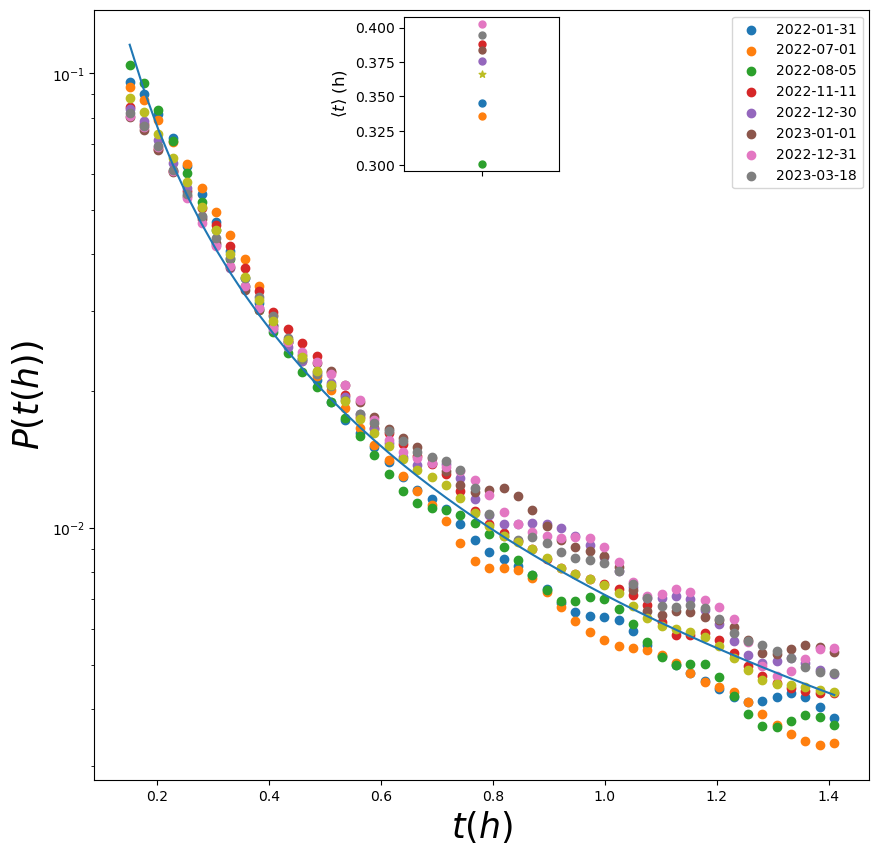

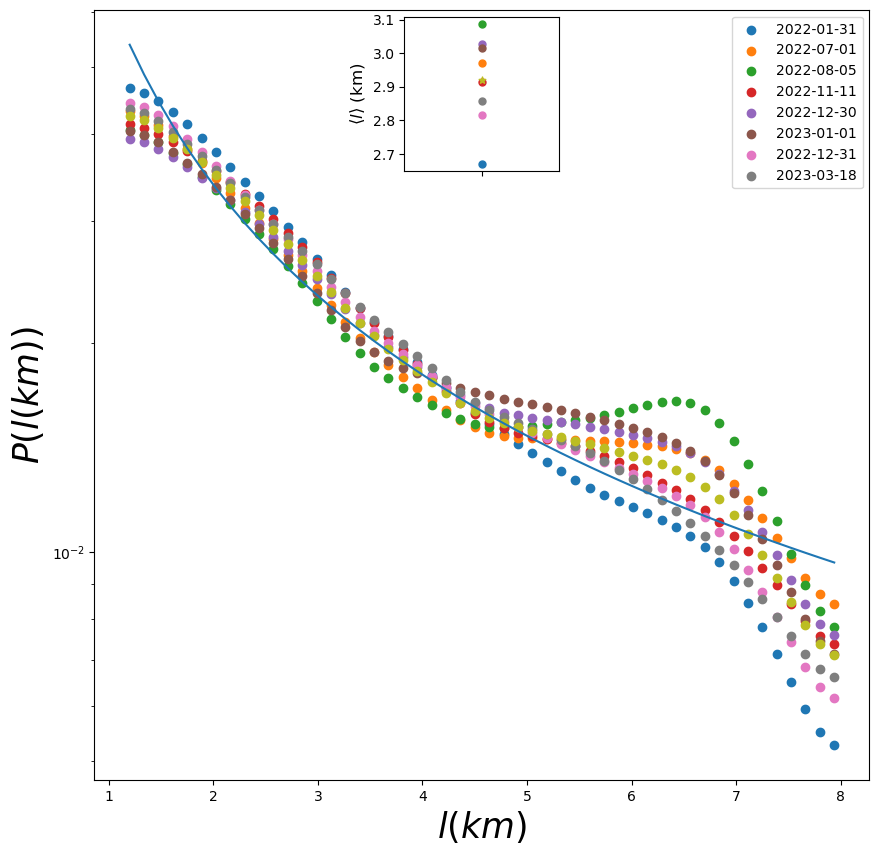

In [ ]:
StrDates = ["2022-01-31","2022-07-01","2022-08-05","2022-11-11","2022-12-30","2023-01-01","2022-12-31","2023-03-18"]
labels = ["1 slowest","2 slowest","2 fastest","1 fastest"]
Features = ["time_hours","lenght_km"]
Classes = [0,1,2,3]
fcm_dir = "/home/aamad/codice/city-pro/output/bologna_mdt_center"
PlotDir = os.path.join(fcm_dir,"plots")
filter_lenght_km = 10
filter_time_hours = 1
filter_space = pl.col("lenght_km") < filter_lenght_km
filter_time = pl.col("time_hours") < filter_time_hours
# from data 2 distribution
bin_size_time_hours = 0.05
bin_size_length_km = 1
range_time_hours = [0.1,filter_time_hours]
range_length_km = [0.1,filter_lenght_km]
enriched_vector_length = 50

feature_2_day_2_x,feature_2_day_2_y,feature_2_day_2_y_fit,feature_2_day_2_mean = Compute_time_length_distributions(Features,
                                   StrDates,
                                   fcm_dir,
                                   filter_space,
                                   filter_time,
                                    bin_size_time_hours,
                                    bin_size_length_km,
                                   range_time_hours = range_time_hours,
                                   range_length_km = range_length_km,
                                   enriched_vector_length = enriched_vector_length
                                  )
Plot_time_length_distribution_averaged_over_days(feature_2_day_2_x,
                                                feature_2_day_2_y,
                                                feature_2_day_2_mean,
                                                StrDates,
                                                enriched_vector_length,
                                                PlotDir,
                                                "")


In [ ]:
import geopandas as gpd
import osmnx as ox
import pandas as pd
#bol = ox.geometries_from_place("Bologna, Italy")
#berkeley = ox.geometries_from_place("Berkeley, California")
bol = ox.geocode_to_gdf("Bologna, Italy")
ber = ox.geocode_to_gdf("Berkeley, California")
tn = ox.geocode_to_gdf("Rovereto, Italy")
bol_ber_tn = gpd.GeoDataFrame(pd.concat([bol, ber, tn], ignore_index=True))
bol_ber_tn.explore()


In [58]:
import itertools

series = [
    [1, 2, 3],
    [1, 2, 4],
    [3, 3, 4,6],
    [2, 3, 5]
]

n = 1

groups = itertools.groupby(series, key=lambda x: tuple(x[:n+1]))

for key, group in groups:
    print(f"Key: {key}")
    for item in group:
        print(f"  Item: {item}")

Key: (1, 2)
  Item: [1, 2, 3]
  Item: [1, 2, 4]
Key: (3, 3)
  Item: [3, 3, 4, 6]
Key: (2, 3)
  Item: [2, 3, 5]


In [1]:
from numpy import random
L = 3
comb = [random.randint(20,100) for i in range(L)]
c0 = random.random()*2
c1 = random.random()*2
d = random.random()*2
print(comb,c0,c1,d)


[25, 67, 28] 0.1517484756935079 0.319497325302865 0.8399702407907828


In [1]:
import numpy as np
def ComputeNumberPartitions(n,m,i,NumberPartition):
    
    if m < n:
        if i == 1 and i < n - m:
            NumberPartition = 1
            i += 1
            ComputeNumberPartitions(n - m,i,NumberPartition)
        if i < n
            i += 1
            NumberPartition = ComputeNumberPartitions(n - m,i,NumberPartition)
    else:
        print("m>=n")
        exit()

SyntaxError: expected ':' (2702245768.py, line 6)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
v0 = 0
v1 = 20
mu = 20
sigma = 2
NR = 1000
# P(Capacity) = [c0,...,cNR]
np.random.seed(0)
Cs = np.random.exponential(1, 1000)
# Capacity Roads
C = np.sum(Cs)
v = np.linspace(v0,v1,1)
G = np.exp(-((v-mu)**2)/(2*sigma**2))